<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/module_2_core_week_I_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA RESULTS PREDICTION

## 1. Defining the Question

### a) Specifying the Question

<b>Overview</b> 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)



Approach 1: Polynomial approach

What to train given:

1. Rank of home team

2. Rank of away team

3. Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# Loading the Dataset
# fifa rankings = https://drive.google.com/file/d/1-UOI7HG2sArlb3IqIFu6ytLIDle1LnAp/view?usp=sharing
# results = https://drive.google.com/file/d/1FyTYM_vW6zywfMPeeC-FCs82jleURwBd/view?usp=sharing

import pandas as pd
import numpy as np
def read_data(url):
  file_id = url.split('/')[-2]
  dwn_url = 'https://drive.google.com/uc?id=' + file_id
  return pd.read_csv(dwn_url)

fifa = read_data(' https://drive.google.com/file/d/1-UOI7HG2sArlb3IqIFu6ytLIDle1LnAp/view?usp=sharing')
results = read_data('https://drive.google.com/file/d/1FyTYM_vW6zywfMPeeC-FCs82jleURwBd/view?usp=sharing')

## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
#
fifa.shape, results.shape

((57793, 16), (40839, 9))

The fifa dataset contains 57793 and 16 columns while the results dataset contains 40839 records and 9 columns.

In [3]:
# Previewing the top of our dataset
#
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# Previewing the bottom of our dataset
# 
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


The fifa dataset contains information on rankings and rank changes for teams since 1993 to 2018. For our analysis and prediction, we are going to use the results dataset which carries the focus of the research question. 

In [7]:
# Checking whether each column has an appropriate datatype
#
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [8]:
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [9]:
# convert date to datetime
from datetime import datetime
results['date'] = pd.to_datetime(results['date'],  format='%Y-%m-%d')
fifa['rank_date'] = pd.to_datetime(fifa['rank_date'], format='%Y-%m-%d')

In [10]:
# create a column for year and month for each dataset
def month_year(data,column):
  data['year'] = pd.DatetimeIndex(data[column]).year
  data['year'] = data['year'].astype(str)
  data['month'] = pd.DatetimeIndex(data[column]).month
  data['month'] = data['month'].astype(str)
  # join month and year column
  data['month_year'] = data['year'] + '-' + data['month']

  # making adjustments
  data.drop('month', axis=1, inplace=True)
  data['year'] = data['year'].astype(int)
  return data.head()

month_year(results, 'date')  
month_year(fifa, 'rank_date')

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month_year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,1993-8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,1993-8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,1993-8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,1993-8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,1993-8


In [11]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
month_year            object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

The results dataset contains games played since 1872 to 2019. However fifa began in 21st May 1904. To retain validity of our data, we will drop the dates before then while cleaning out outliers.

## 5. Tidying the Dataset

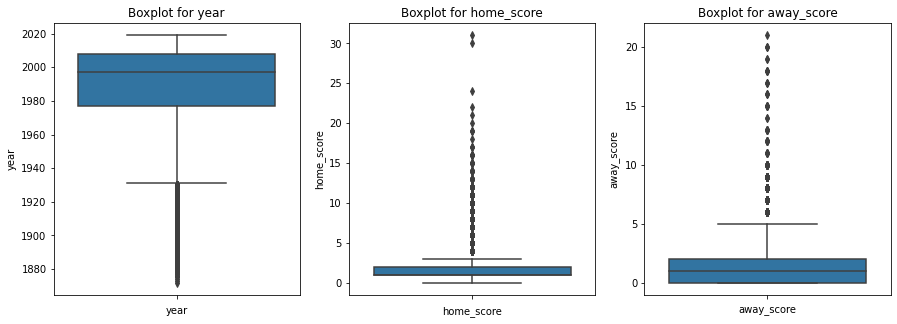

In [12]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['year', 'home_score', 'away_score']
fig, ax = plt.subplots(ncols=len(columns),figsize=(15,5))

for i, column in enumerate(columns):
    sns.boxplot(y = results[column], ax=ax[i])
    ax[i].set_title('Boxplot for {}'.format(column))
    ax[i].set_xlabel(column)

plt.show()

From the outliers visuals, we can see that most games were played between 1940 and 2020. There are outliers for score which dont seem to be outliers as there is no limit to number of scores per game.

In [13]:
# dropping years before 1904
results.drop(results[results['year'] < 1904].index, inplace=True)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year
154,1904-02-29,Wales,England,2,2,British Championship,Wrexham,Wales,False,1904,1904-2
155,1904-03-12,Northern Ireland,England,1,3,British Championship,Belfast,Republic of Ireland,False,1904,1904-3
156,1904-03-12,Scotland,Wales,1,1,British Championship,Dundee,Scotland,False,1904,1904-3
157,1904-03-21,Wales,Northern Ireland,0,1,British Championship,Bangor,Wales,False,1904,1904-3
158,1904-03-26,Northern Ireland,Scotland,1,1,British Championship,Dublin,Republic of Ireland,False,1904,1904-3


In [14]:
# reset index
results = results.reset_index()
results.head()

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year
0,154,1904-02-29,Wales,England,2,2,British Championship,Wrexham,Wales,False,1904,1904-2
1,155,1904-03-12,Northern Ireland,England,1,3,British Championship,Belfast,Republic of Ireland,False,1904,1904-3
2,156,1904-03-12,Scotland,Wales,1,1,British Championship,Dundee,Scotland,False,1904,1904-3
3,157,1904-03-21,Wales,Northern Ireland,0,1,British Championship,Bangor,Wales,False,1904,1904-3
4,158,1904-03-26,Northern Ireland,Scotland,1,1,British Championship,Dublin,Republic of Ireland,False,1904,1904-3


In [15]:
# drop index column
results.drop('index', axis=1, inplace=True)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year
0,1904-02-29,Wales,England,2,2,British Championship,Wrexham,Wales,False,1904,1904-2
1,1904-03-12,Northern Ireland,England,1,3,British Championship,Belfast,Republic of Ireland,False,1904,1904-3
2,1904-03-12,Scotland,Wales,1,1,British Championship,Dundee,Scotland,False,1904,1904-3
3,1904-03-21,Wales,Northern Ireland,0,1,British Championship,Bangor,Wales,False,1904,1904-3
4,1904-03-26,Northern Ireland,Scotland,1,1,British Championship,Dublin,Republic of Ireland,False,1904,1904-3


In [16]:
# Checking for Anomalies
#
# check interquatile range
def interquatile_range(column):
  q1 = results[column].quantile(.25)
  q3 = results[column].quantile(.75)
  intqr = q3 - q1
  return print({column: [q1,q3,intqr]})

for column in columns:
  interquatile_range(column)

{'year': [1977.0, 2008.0, 31.0]}
{'home_score': [1.0, 2.0, 1.0]}
{'away_score': [0.0, 2.0, 2.0]}


In [17]:
# Identifying the Missing Data
#
results.isnull().sum()

# There are no missing values in our dataset.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
month_year    0
dtype: int64

In [18]:
# More data cleaning procedures
#
# check for duplicates
results.duplicated().sum()

# There are no duplicated values

0

In [19]:
# check uniformity in columns
results.columns

# columns are uniform

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month_year'],
      dtype='object')

## 6. Exploratory Analysis

In [20]:
# Ploting the univariate summaries and recording our observations
#
results.describe(include='all', datetime_is_numeric=True)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year
count,40685,40685,40685,40685.000000,40685.000000,40685,40685,40685,40685,40685.000000,40685
unique,NaN,309,306,NaN,NaN,109,1955,266,2,NaN,1315
top,NaN,Brazil,Uruguay,NaN,NaN,Friendly,Kuala Lumpur,United States,False,NaN,2019-6
freq,NaN,563,535,NaN,NaN,16874,581,1142,30527,NaN,239
mean,1990-11-04 01:51:03.959690240,NaN,NaN,1.741379,1.184589,NaN,NaN,NaN,NaN,1990.323780,NaN
min,1904-02-29 00:00:00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1904.000000,NaN
25%,1977-11-10 00:00:00,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,1977.000000,NaN
50%,1997-06-03 00:00:00,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1997.000000,NaN
75%,2008-09-19 00:00:00,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,2008.000000,NaN
max,2019-07-20 00:00:00,NaN,NaN,31.000000,21.000000,NaN,NaN,NaN,NaN,2019.000000,NaN


The dates range from 1904 to 2019.

There are 309 unique home teans and 306 unique away teams.

There are 266 countries and 1955 cities where the tournaments were held.

There are 109 unique tournaments.

In [21]:
# barplot function for value counts
def barplot(column):
  results[column].value_counts().plot.bar(figsize=(35,4))
  #sns.barplot(y = results[column].value_counts())
  plt.title('Barplot for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

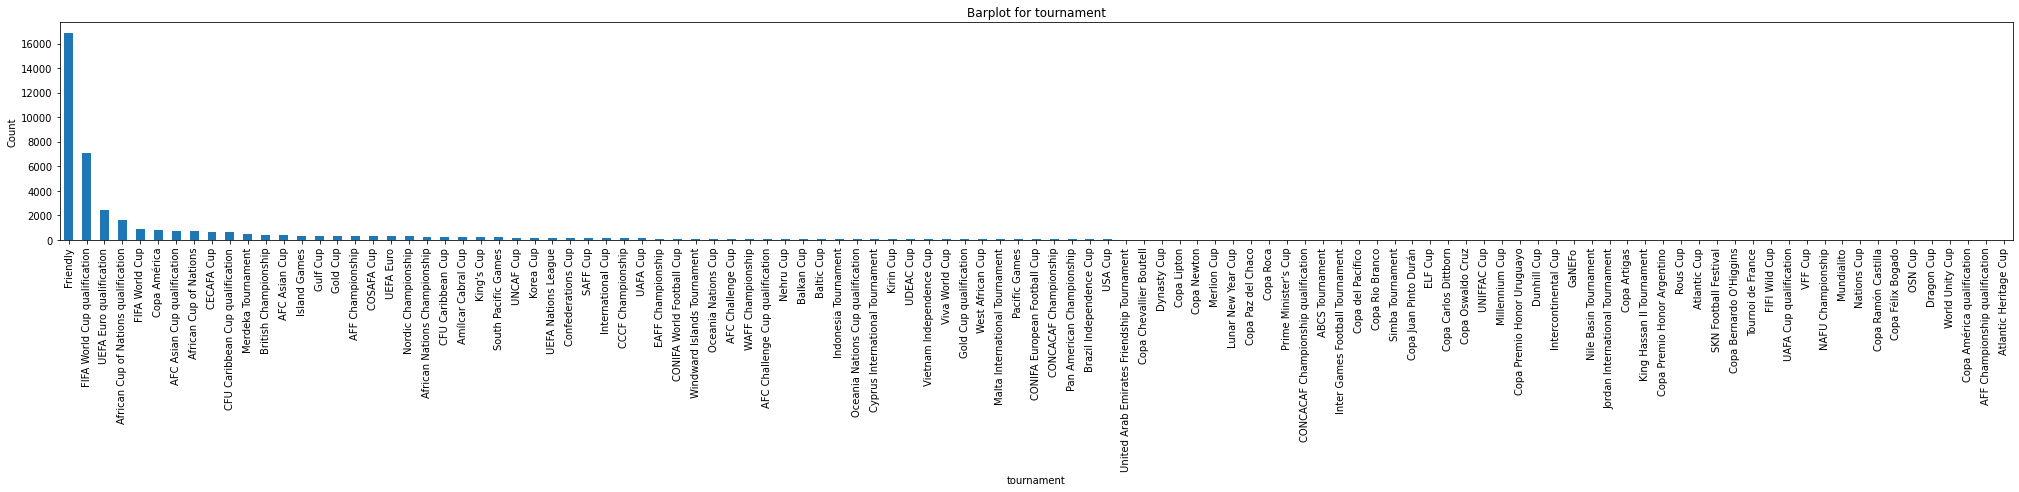

In [22]:
# tournament representation
barplot('tournament')

Most played matches are friendly matches.

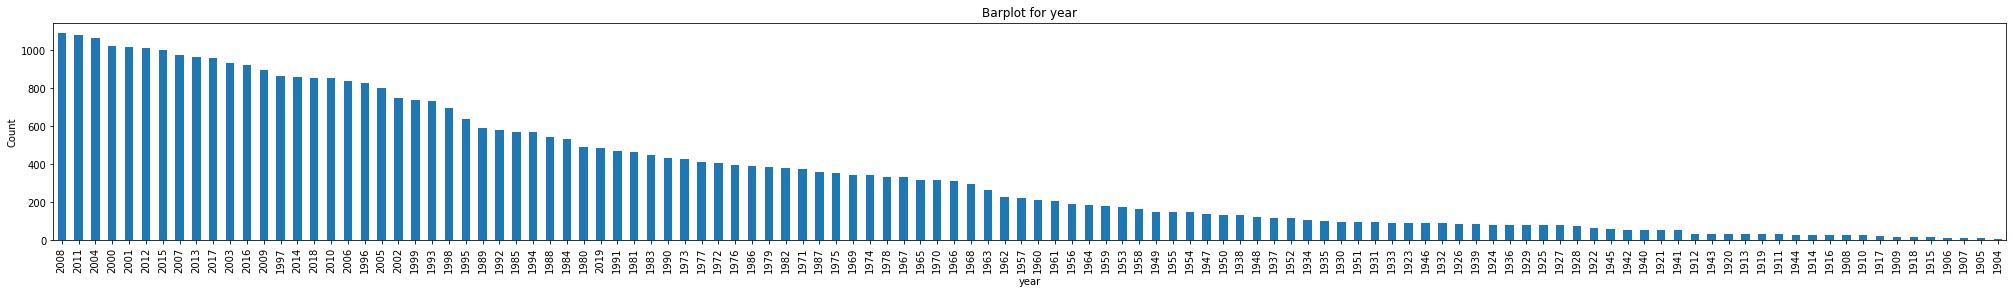

In [23]:
# year representation
barplot('year')

Most games in the dataset were played in 2008

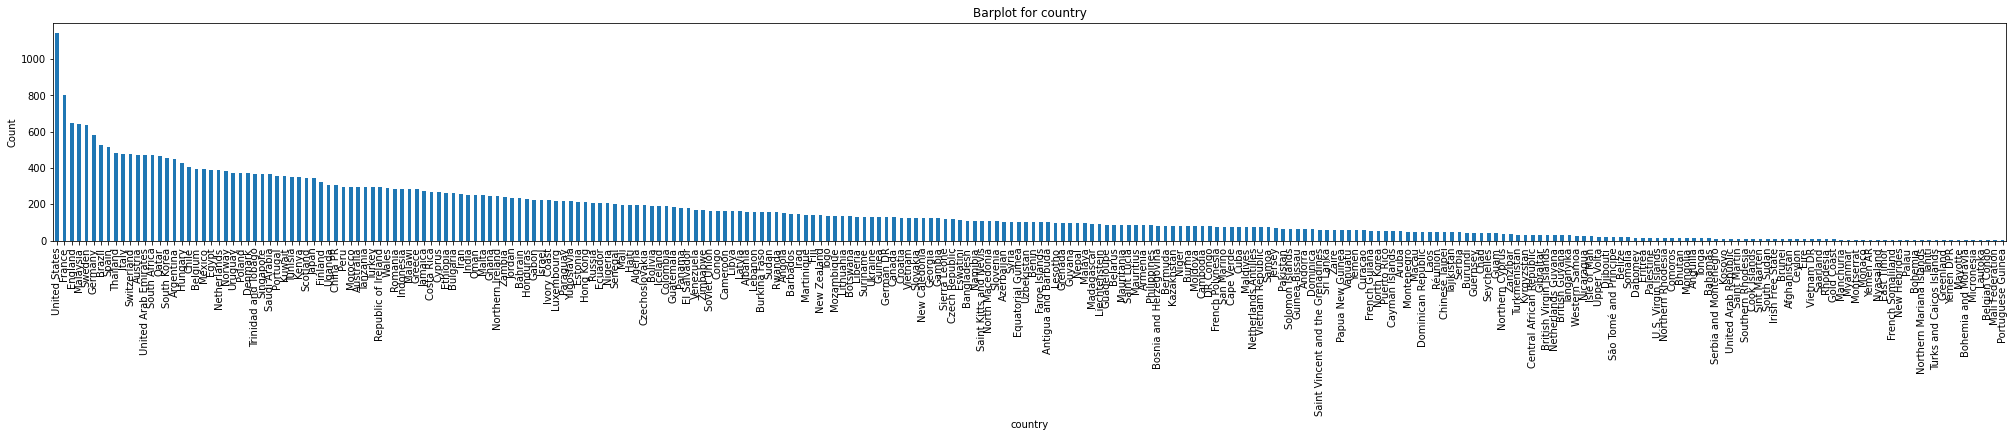

In [24]:
# country representation
barplot('country')

Most games were played in the United States.

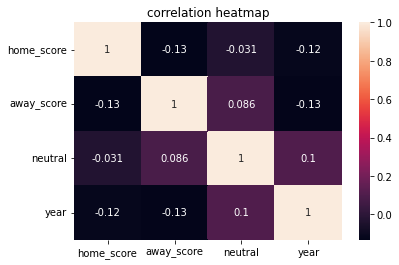

In [25]:
# Bivariate analysis

# check correlation
sns.heatmap(results.corr(), annot=True)
plt.title('correlation heatmap')
plt.show()

The variables are weakly correlated hence fully independent.

## 7. Implementing the Solution

Our dataset doesnot contain the target variable. This is however calculated from the score table. We are going to create our target variable as points with respect to the home team as follows: 

win - 3 points

draw - 2 points

lose - 1 point

### Formula for ranking points:

<b>Points = Previous points + I * (W - We)</b>

I: Importance of the match:

<i>I= 05 Friendly matches played outside of International Match Calendar windows

I= 10 Friendly matches played during International Match Calendar windows

I= 15 Group phase matches of Nations League competitions

I= 25 Play-off and final matches of Nations League competitions

I= 25 Qualification matches for Confederations final competitions and for FIFA World Cup final competitions

I= 35 Confederation final competition matches up until the QF stage

I= 40 Confederation final competition matches from the QF stage onwards; all FIFA Confederations Cup matches

I= 50 FIFA World Cup final competition matches up until QF stage

I= 60 FIFA World Cup final competition matches from QF stage onwards</i> 

W is either: win = 1, draw = 0.5, lose = 0

We = 1/ (10exp(-(teamA previous points - teamB previous points)/600) + 1)


In [26]:
# Implementing the Solution
# 
# we shall compare the home and away score and award points with respect to the home score

# create a value pair for home_score and away score
home_score = results['home_score'].tolist()
away_score = results['away_score'].tolist()
scores = list(zip(home_score,away_score))

# create an empty list to append points
points = []

# compare each value pair to award scores
for score in scores:
    if score[0] > score[1]:
       point = 1
    elif  score[0] == score[1]:  
       point = 0.5
    else:
       point = 0
    points.append(point)    

# convert points into a dataframe 
points = pd.DataFrame(points)

# rename column to points
points.columns = ['points']
points.head()

,points
0,0.5
1,0.0
2,0.5
3,0.0
4,0.5


In [27]:
# add points to results dataset
df = pd.concat([results, points], axis=1) 
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points
0,1904-02-29,Wales,England,2,2,British Championship,Wrexham,Wales,False,1904,1904-2,0.5
1,1904-03-12,Northern Ireland,England,1,3,British Championship,Belfast,Republic of Ireland,False,1904,1904-3,0.0
2,1904-03-12,Scotland,Wales,1,1,British Championship,Dundee,Scotland,False,1904,1904-3,0.5
3,1904-03-21,Wales,Northern Ireland,0,1,British Championship,Bangor,Wales,False,1904,1904-3,0.0
4,1904-03-26,Northern Ireland,Scotland,1,1,British Championship,Dublin,Republic of Ireland,False,1904,1904-3,0.5


In [28]:
# create a subset of the fifa dataset to only include important features
rank = fifa[['rank', 'country_full', 'total_points', 'month_year']]
rank.head()

,rank,country_full,total_points,month_year
0,1,Germany,0.0,1993-8
1,2,Italy,0.0,1993-8
2,3,Switzerland,0.0,1993-8
3,4,Sweden,0.0,1993-8
4,5,Argentina,0.0,1993-8


In [29]:
home = df.merge(rank, how='inner', left_on = ['home_team', 'month_year'], right_on=['country_full', 'month_year'])
home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points,rank,country_full,total_points
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,0.5,19,Colombia,0.0
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,1.0,19,Colombia,0.0
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,1.0,19,Colombia,0.0
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,1993-8,0.0,70,Peru,0.0
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,1993-8,0.0,70,Peru,0.0


In [30]:
home.shape

(18609, 15)

In [31]:
# rename rank column to Home Team Rank
home.rename(columns = {'rank': 'home_team_rank'}, inplace=True)
home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points,home_team_rank,country_full,total_points
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,0.5,19,Colombia,0.0
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,1.0,19,Colombia,0.0
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,1.0,19,Colombia,0.0
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,1993-8,0.0,70,Peru,0.0
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,1993-8,0.0,70,Peru,0.0


In [32]:
away =  df.merge(rank, how='inner', left_on = ['away_team', 'month_year'], right_on=['country_full', 'month_year'])
away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points,rank,country_full,total_points
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,0.5,67,Paraguay,0.0
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,1993-8,0.5,67,Paraguay,0.0
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,1993-8,0.0,5,Argentina,0.0
3,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,1993-8,0.0,5,Argentina,0.0
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,1.0,5,Argentina,0.0


In [33]:
away.shape

(18526, 15)

In [34]:
# rename rank column to Away Team Rank
away.rename(columns = {'rank': 'away_team_rank'}, inplace=True)
away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points,away_team_rank,country_full,total_points
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,0.5,67,Paraguay,0.0
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,1993-8,0.5,67,Paraguay,0.0
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,1993-8,0.0,5,Argentina,0.0
3,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,1993-8,0.0,5,Argentina,0.0
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,1993-8,1.0,5,Argentina,0.0


In [35]:
away.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month_year',
       'points', 'away_team_rank', 'country_full', 'total_points'],
      dtype='object')

In [36]:
# we now merge the two datasets for home and away on home_team, away_team and month_year
df = home.merge(away, how='inner', on = ['date', 'home_team', 'away_team', 'tournament'])
df.head()

,date,home_team,away_team,home_score_x,away_score_x,tournament,city_x,country_x,neutral_x,year_x,...,away_score_y,city_y,country_y,neutral_y,year_y,month_year_y,points_y,away_team_rank,country_full_y,total_points_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,...,0,Barranquilla,Colombia,False,1993,1993-8,0.5,67,Paraguay,0.0
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,...,1,Barranquilla,Colombia,False,1993,1993-8,1.0,5,Argentina,0.0
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,...,0,Barranquilla,Colombia,False,1993,1993-8,1.0,70,Peru,0.0
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,...,1,Lima,Peru,False,1993,1993-8,0.0,5,Argentina,0.0
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,...,1,Lima,Peru,False,1993,1993-8,0.0,19,Colombia,0.0


In [37]:
df.shape

(16957, 26)

In [38]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score_x', 'away_score_x',
       'tournament', 'city_x', 'country_x', 'neutral_x', 'year_x',
       'month_year_x', 'points_x', 'home_team_rank', 'country_full_x',
       'total_points_x', 'home_score_y', 'away_score_y', 'city_y', 'country_y',
       'neutral_y', 'year_y', 'month_year_y', 'points_y', 'away_team_rank',
       'country_full_y', 'total_points_y'],
      dtype='object')

In [39]:
# lets pick only necessary columns for our prediction
df1 = df[['date', 'home_team', 'away_team', 'home_score_x', 'away_score_x',
       'tournament', 'home_team_rank','away_team_rank']]
df1.head()

,date,home_team,away_team,home_score_x,away_score_x,tournament,home_team_rank,away_team_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,19,70
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,70,5
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,70,19


In [40]:
# rename columns
df1 = df1.rename(columns = {'home_score_x': 'home_score', 'away_score_x': 'away_score' })
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,19,70
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,70,5
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,70,19


## Polynomial Approach

What to train given:

Rank of home team

Rank of away team

Tournament type

#### Model 1: Predict how many goals the home team scores.



In [41]:
# select necessary columns
df2 = df1[['home_team_rank', 'away_team_rank', 'tournament', 'home_score', 'away_score']]
df2.head()

,home_team_rank,away_team_rank,tournament,home_score,away_score
0,19,67,FIFA World Cup qualification,0,0
1,19,5,FIFA World Cup qualification,2,1
2,19,70,FIFA World Cup qualification,4,0
3,70,5,FIFA World Cup qualification,0,1
4,70,19,FIFA World Cup qualification,0,1


In [42]:
# turn tournament categorical column into a numeric column
df2 = pd.get_dummies(df2)
df2.head()

,home_team_rank,away_team_rank,home_score,away_score,tournament_ABCS Tournament,tournament_AFC Asian Cup,tournament_AFC Asian Cup qualification,tournament_AFC Challenge Cup,tournament_AFC Challenge Cup qualification,tournament_AFF Championship,...,tournament_UAFA Cup qualification,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UNCAF Cup,tournament_UNIFFAC Cup,tournament_USA Cup,tournament_United Arab Emirates Friendship Tournament,tournament_VFF Cup,tournament_WAFF Championship,tournament_Windward Islands Tournament
0,19,67,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19,5,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19,70,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,70,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70,19,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# split data into X and y

X = df2.drop(['home_score', 'away_score'], axis=1).values
y = df2['home_score'].values

In [44]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state = 0)

In [45]:
# create Linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# fit for X_train and y_train
lin_reg.fit(X_train, y_train)

# evaluate results
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


1.494556044713818

In [46]:
# finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()

,0
count,3392.000000
mean,0.029287
std,1.494489
min,-3.314312
25%,-0.957893
50%,-0.191329
75%,0.737945
max,18.734009


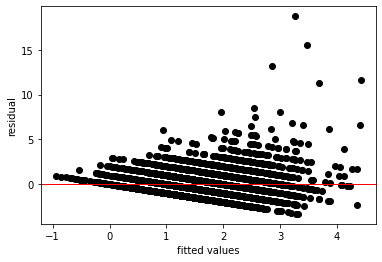

In [47]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

We can see that there are several outliers despite the mean being very close to zero. Therefore the data is not normally distributed.

In [48]:
# fitting polynimial regression

# create polynomial regression object
from sklearn.preprocessing import PolynomialFeatures

# look for a degree that minimizes the rmse
poly_reg = PolynomialFeatures(degree = 2)

# transform X_train 
X_poly = poly_reg.fit_transform(X_train)
X_test = poly_reg.transform(X_test)


In [49]:
# fit polynimial regression fitted model into linear regression
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y_train)

# evaluate results
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.4732891825075378

In [49]:
# performing k_fold cross validation
from sklearn.model_selection import KFold
from sklearn import metrics

# perform k-fold using 10 folds
folds = KFold(n_splits=10)

# number of folds/splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess the 10 models based on the folds we created.

RMSES = [] 
count = 1

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly

  lin_reg = LinearRegression()

  # fit for X_train and y_train
  lin_reg.fit(X_train, y_train)

  # look for a degree that minimizes the rmse
  poly_reg = PolynomialFeatures(degree = 2)

  # transform X_train 
  X_poly = poly_reg.fit_transform(X_train)

  # fit polynimial regression fitted model into linear regression
  lin_reg = LinearRegression()

  lin_reg.fit(X_poly, y_train)
  
  # assess the accuraccy of the model
  y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' --- Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 --- Root Mean Squared Error: 1.4200271095712145

Training model 2
Model 2 --- Root Mean Squared Error: 1.6108540491123773

Training model 3
Model 3 --- Root Mean Squared Error: 1.7305512694169771

Training model 4
Model 4 --- Root Mean Squared Error: 1.4252402864828946

Training model 5
Model 5 --- Root Mean Squared Error: 1.3331345328414415

Training model 6
Model 6 --- Root Mean Squared Error: 1.3514037579830955

Training model 7
Model 7 --- Root Mean Squared Error: 330860554.13961166

Training model 8
Model 8 --- Root Mean Squared Error: 1.3569787076926219

Training model 9
Model 9 --- Root Mean Squared Error: 28738484.255270462

Training model 10
Model 10 --- Root Mean Squared Error: 1.381809502419604


The least rmse score for polynomial regression method is for model 5 ---> 1.33.

In [50]:
 # finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()


,0
count,3392.000000
mean,0.035134
std,1.473087
min,-3.682362
25%,-0.945352
50%,-0.195447
75%,0.721033
max,18.046161


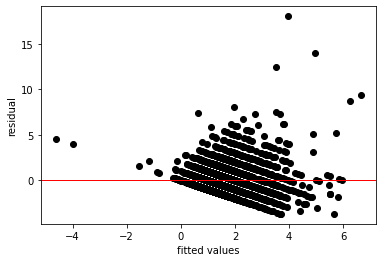

In [51]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are not centered around the mean which is close to 0. There is a pattern in the data which implies that there is unequal variance between at least two data points. The data is also not normally distributed due to the presence of outliers.

In [52]:
# heteroskedasticity test
from scipy import stats

test_result, p_value = stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# results in inf = infinity

inf


#### Model 2: Predict how many goals the away team scores.

In [53]:
# split data into X and y

X = df2.drop(['home_score', 'away_score'], axis=1).values
y = df2['away_score'].values

In [54]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state = 0)

In [55]:
# create Linear regression model
lin_reg = LinearRegression()

# fit for X_train and y_train
lin_reg.fit(X_train, y_train)

# evaluate results

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.120362322401792

In [56]:
# finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()

,0
count,3392.000000
mean,-0.020007
std,1.120349
min,-2.773878
25%,-0.809653
50%,-0.188716
75%,0.526550
max,8.000469


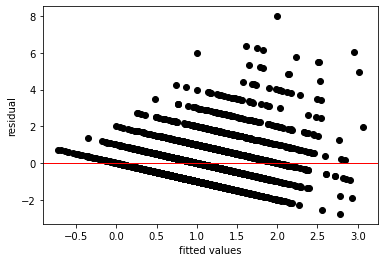

In [57]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

There are several outliers despite the mean being very close to zero. Therefore the data is not normally distributed.

In [58]:
# fitting polynimial regression

# create polynomial regression object
from sklearn.preprocessing import PolynomialFeatures

# look for a degree that minimizes the rmse
poly_reg = PolynomialFeatures(degree = 2)

# transform X_train 
X_poly = poly_reg.fit_transform(X_train)
X_test = poly_reg.transform(X_test)

In [59]:
# fit polynimial regression fitted model into linear regression
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y_train)

# evaluate results
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.1159224931407143

In [60]:
# performing k_fold cross validation
from sklearn.model_selection import KFold
from sklearn import metrics

# perform k-fold using 10 folds
folds = KFold(n_splits=10)

# number of folds/splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess the 10 models based on the folds we created.

RMSES = [] 
count = 1

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly

  lin_reg = LinearRegression()

  # fit for X_train and y_train
  lin_reg.fit(X_train, y_train)

  # look for a degree that minimizes the rmse
  poly_reg = PolynomialFeatures(degree = 2)

  # transform X_train 
  X_poly = poly_reg.fit_transform(X_train)

  # fit polynimial regression fitted model into linear regression
  lin_reg = LinearRegression()

  lin_reg.fit(X_poly, y_train)
  
  # assess the accuraccy of the model
  y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' --- Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 --- Root Mean Squared Error: 1.1770342823433069

Training model 2
Model 2 --- Root Mean Squared Error: 1.9064965678750283

Training model 3
Model 3 --- Root Mean Squared Error: 1.1861731695413884

Training model 4
Model 4 --- Root Mean Squared Error: 1.1320210812611962

Training model 5
Model 5 --- Root Mean Squared Error: 1.1403636277805722

Training model 6
Model 6 --- Root Mean Squared Error: 1.1951408076503347

Training model 7
Model 7 --- Root Mean Squared Error: 905722538.8469694

Training model 8
Model 8 --- Root Mean Squared Error: 1.2027379407328274

Training model 9
Model 9 --- Root Mean Squared Error: 4473993.171134235

Training model 10
Model 10 --- Root Mean Squared Error: 1.0783134923653765


Model 10 has the least rmse = 1.078

In [61]:
 # finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()

,0
count,1695.000000
mean,0.000711
std,1.078631
min,-4.373445
25%,-0.785602
50%,-0.130357
75%,0.540766
max,6.394211


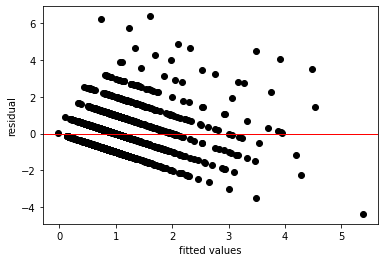

In [62]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [63]:
# heteroskedasticity test
from scipy import stats

test_result, p_value = stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# results in inf = infinity

inf


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?